# Second Pipeline


## Autoencoder for Image Compression

### Executive Summary

This assignment explores the use of autoencoders for image compression. The project begins by explaining the data used, including images from the Germany semester in Minerva. The photos are then preprocessed and converted to a format suitable for the autoencoder model. The autoencoder is constructed using convolutional and max-pooling layers in the encoder and deconvolutional layers in the decoder. The model is trained using the mean squared error (MSE) loss function and the Adam optimizer. The model's performance is evaluated by visualizing the original and reconstructed images and calculating the encoded images' compression ratio. The results indicate that the autoencoder can reconstruct the original images with moderate accuracy and achieve a high compression ratio. Overall, this paper demonstrates the potential of autoencoders for image compression.

### Section 1

During my studies at Minerva, I collected tens of gigabytes of photos from various places. The problem with digital images is that they can take up a lot of digital memory, especially when dealing with high-resolution images. It can make it difficult to store and manage extensive collections of photos. One way to address this issue is to compress the pictures by reducing their file size.

In this assignment, I used an autoencoder to compress the photos from Germany semester in Minerva to reduce their digital memory footprint. I also explored how the autoencoder is implemented and evaluated the compression effectiveness using performance metrics.

In this project, the data is a collection of 100 photos taken during the semester in Germany as part of my studies at Minerva. All the images were taken using a smartphone camera. The photos were obtained from my personal digital archive. The photos were saved in JPEG format, and their resolutions vary, so they should be resized to a consistent size of 256 x 256 pixels for processing.

### Section 2

Let's start with imports.

In [ ]:
!pip install Pillow

import numpy as np
import os
import cv2
from sys import getsizeof
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

This code processes image data in the jpeg format located in a data directory. For each jpeg file, the code opens the file, resizes the image to a size of 256x256 pixels, converts the image to a NumPy array, and scales the pixel values to be between 0 and 1 by dividing each element by 255. 

In the end, the list of processed images is converted to a NumPy array for future processing.

In [ ]:
image_folder = "/content/data"
image_files = os.listdir(image_folder)
image_files = [f for f in image_files if f.endswith('.jpeg')]
images = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    img = Image.open(image_path)
    img = img.resize((256, 256))
    img_array = np.array(img) / 255.0
    images.append(img_array)

images = np.array(images)

### Section 3

I already did necessary pre-processing (resizing and scaling) in the previous section.


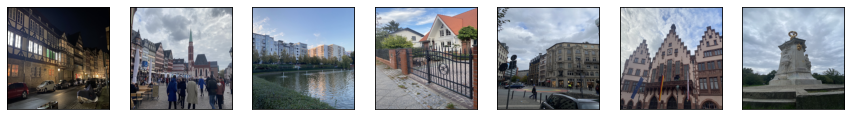

In [ ]:
def visualize_images(original_images, n=7):
    plt.figure(figsize=(15, 7))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

visualize_images(images)

### Section 4

Unsupervised learning is a class of machine learning techniques that aims to learn patterns or representations from data without the need of data labels. In the context of image compression, unsupervised learning can be applied to find an efficient representation of the input images that preserves the essential features while reducing the storage space.

The primary goal of unsupervised learning for image compression is to find a function that can represent the original input data (x) in a lower-dimensional latent space (z) while preserving the essential features. Mathematically, this can be represented as:

\begin{equation}
z = f(x)
\end{equation}

Additionally, the algorithm should also learn a reconstruction function ($g$) that can regenerate the input data ($x$) from the lower-dimensional latent representation ($z$). Mathematically, this can be represented as:

\begin{equation}
x' = g(z)
\end{equation}

The objective is to minimize the reconstruction error between the original input data ($x$) and the reconstructed data ($x'$). In the context of image compression, this error is often represented as the Mean Squared Error (MSE) loss:

\begin{equation}
L(x, x') = \frac{1}{n} \sum (x - x')^2
\end{equation}

where $n$ is the number of pixels in the image.

In summary, unsupervised learning for image compression involves finding a lower-dimensional representation of the input images that preserves the essential features while minimizing the reconstruction error. 

In [ ]:
# Split data into train and test sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

### Section 5

I used Convolutional Autoencoder (CAE) for this assignment for image compression. The reasons for that are as follows:

**Efficient Representation Learning**: CAEs are designed explicitly for processing image data. They employ convolutional layers that capture the images' local patterns and spatial features, resulting in a more efficient and effective compression. It makes CAEs more suitable for image compression tasks than other unsupervised learning methods like Principal Component Analysis (PCA) or K-means clustering, which do not inherently capture local patterns in the data.

**Dimensionality Reduction**: Autoencoders, including CAEs, can learn lower-dimensional representations of high-dimensional input data. It is a crucial aspect of image compression, as it allows the CAE to reduce the input images' storage space while preserving their essential features.

**Robustness to Small Translations**: Due to the use of pooling layers in the encoder part of the CAE, the model becomes more robust to small translations and distortions in the input images. It is beneficial in the image compression task, as it allows the CAE to maintain the quality of the compressed pictures even in the presence of minor variations in the input data.

**Non-linear Feature Learning**: CAEs use non-linear activation functions, such as Rectified Linear Units (ReLU), which allow the model to learn complex, non-linear patterns and features in the input data. It enhances the model's ability to capture the essential elements of the input images and reconstruct them accurately during the decompression process.

The CAE model consists of two primary components: the encoder and the decoder. The encoder maps the input image (256x256x3) to a lower-dimensional latent representation using convolutional and max-pooling layers. The decoder then reconstructs the input image from the latent model using convolutional and upsampling layers.

#### Convolutional Layers
Convolutional layers are the building blocks of CAEs. They apply convolution operations to the input, using learnable filters (kernels) to capture local patterns in the data. Mathematically, a convolution operation can be represented as:

\begin{equation}
(I * K)(i, j) = \sum_m \sum_n I(i-m, j-n) K(m, n)
\end{equation}

where $I$ is the input image or feature map, $K$ is the kernel, and * denotes the convolution operation. The convolution output is a new feature map highlighting the presence of specific patterns in the input.

#### Activation Functions
Activation functions introduce non-linearity into the CAE, enabling the model to learn complex patterns and representations. The most common activation function used in CAEs is the Rectified Linear Unit (ReLU), defined as:

\begin{equation}
ReLU(x) = \max(0, x)
\end{equation}

The ReLU activation function is applied element-wise to the output of the convolutional layers, allowing the model to learn non-linear patterns in the data.

#### Pooling Layers
Pooling layers reduce the spatial dimensions of the feature maps, making the model more robust to small translations and reducing the number of parameters. Max-pooling is the most commonly used pooling operation in CAEs, which selects the maximum value within a local neighborhood. Mathematically, max-pooling can be represented as:

\begin{equation}
MaxPool(I)(i, j) = \max{I(m, n) | m \in [i, i + p), n \in [j, j + p)}
\end{equation}

where $I$ is the input feature map, and $p$ is the pooling size.

#### Upsampling Layers
Upsampling layers are used in the CAE's decoder part to increase the feature maps' spatial dimensions, effectively reversing the max-pooling operation. One common upsampling technique is nearest-neighbor upsampling, which duplicates the values in the input feature map. Mathematically, nearest-neighbor upsampling can be represented as:

\begin{equation}
Upsample(I)(i, j) = I(\lfloor i/s \rfloor, \lfloor j/s \rfloor)
\end{equation}

where $I$ is the input feature map, and $s$ is the upsampling factor.

#### Loss Function
The objective of the CAE is to minimize the reconstruction error between the original input data ($x$) and the reconstructed data ($x'$). In the context of image compression, this error is often represented as the Mean Squared Error (MSE) loss:

\begin{equation}
L(x, x') = \frac{1}{n} \sum (x - x')^2
\end{equation}

where $n$ is the number of pixels in the image.

By combining these mathematical components, the CAE learns to encode input images into a lower-dimensional latent representation that preserves essential features and decodes them back to their original form with minimal reconstruction error. Using convolutional layers enables the model to efficiently capture local patterns in the image data, making the compression process more effective.

In [ ]:
def create_autoencoder():
    input_img = Input(shape=(256, 256, 3))
    
    # Encoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

autoencoder = create_autoencoder()
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 encoder (MaxPooling2D)      (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                             

### Section 6

I trained the autoencoder on the training set, and evaluated its performance on the test set. For it,  I used the fit method to train the model for 30 epochs with a batch size of 25.


In [ ]:
history = autoencoder.fit(train_images, train_images, epochs=30, batch_size=25, validation_data=(test_images, test_images))
reconstructed_images = autoencoder.predict(test_images)

Epoch 1/30
4/4 [==============================] - 16s 3s/step - loss: 0.0718 - val_loss: 0.0663
Epoch 2/30
4/4 [==============================] - 13s 3s/step - loss: 0.0650 - val_loss: 0.0575
Epoch 3/30
4/4 [==============================] - 13s 3s/step - loss: 0.0554 - val_loss: 0.0448
Epoch 4/30
4/4 [==============================] - 13s 3s/step - loss: 0.0422 - val_loss: 0.0342
Epoch 5/30
4/4 [==============================] - 13s 3s/step - loss: 0.0324 - val_loss: 0.0304
Epoch 6/30
4/4 [==============================] - 14s 3s/step - loss: 0.0265 - val_loss: 0.0201
Epoch 7/30
4/4 [==============================] - 13s 3s/step - loss: 0.0197 - val_loss: 0.0171
Epoch 8/30
4/4 [==============================] - 13s 3s/step - loss: 0.0164 - val_loss: 0.0146
Epoch 9/30
4/4 [==============================] - 13s 3s/step - loss: 0.0139 - val_loss: 0.0131
Epoch 10/30
4/4 [==============================] - 14s 3s/step - loss: 0.0117 - val_loss: 0.0112
Epoch 11/30
4/4 [======================

### Section 7

To assess the performance of the autoencoder, I decided to use three metrics: MSE, PSNR, and SSIM.

#### Mean Squared Error (MSE)


Mean Squared Error (MSE) is a widely used metric for measuring two images' differences. In the context of image compression, it measures the average squared difference between the original image ($x$) and the reconstructed image ($x'$).

The mathematical underpinnings of the metric were already described in Section 5.

MSE is a simple and easy-to-calculate metric, but it has some limitations regarding perceptual quality assessment. A lower MSE value indicates better performance, suggesting the reconstructed image is closer to the original image. However, the MSE does not always align with human perception, as it is sensitive to slight, high-frequency differences that may not be perceptually important.

#### Peak Signal-to-Noise Ratio (PSNR)

Peak Signal-to-Noise Ratio (PSNR) is another metric commonly used to measure the quality of reconstructed images. It is derived from the MSE and represents the ratio between the maximum possible pixel intensity and the MSE. PSNR is often expressed in decibels (dB).

Mathematically, PSNR can be represented as:

\begin{equation}
PSNR(x, x') = 10 \cdot log_{10} \left(\frac{MAX_I^2}{MSE(x, x')}\right)
\end{equation}

where $MAX_I$ is the maximum possible pixel intensity (e.g., 255 for 8-bit images or 1 for normalized images), and $MSE(x, x')$ is the Mean Squared Error between the original and reconstructed images.

A higher PSNR value indicates better performance, as it suggests that the reconstructed image has a higher signal-to-noise ratio than the original image. PSNR is more perceptually meaningful than MSE, as it accounts for the image's dynamic range. However, PSNR still has limitations, as it does not fully capture the perceptual quality of the reconstructed image.


#### Structural Similarity Index (SSIM)


Structural Similarity Index (SSIM) is a more advanced metric for measuring the quality of reconstructed images. SSIM compares the original and reconstructed images' structural, luminance, and contrast information, aiming to better align with human perception.

Mathematically, SSIM can be represented as:

\begin{equation}
SSIM(x, x') = [l(x, x') \cdot c(x, x') \cdot s(x, x')]
\end{equation}

where $l(x, x')$ is the luminance comparison function, $c(x, x')$ is the contrast comparison function, and $s(x, x')$ is the structure comparison function. The functions are defined as follows:

\begin{equation}
l(x, x') = \frac{2\mu_x \mu_{x'} + C_1}{\mu_x^2 + \mu_{x'}^2 + C_1}
\end{equation}

\begin{equation}
c(x, x') = \frac{2\sigma_x \sigma_{x'} + C_2}{\sigma_x^2 + \sigma_{x'}^2 + C_2}\end{equation}

\begin{equation}
s(x, x') = \frac{\sigma_{x, x'} + C_3}{\sigma_x \sigma_{x'} + C_3}
\end{equation}

where $\mu_x$ and $\mu_{x'}$ are the mean pixel intensities of the original and reconstructed images, $\sigma_x$ and $\sigma_{x'}$ are their standard deviations, $\sigma_{x, x'}$ is the covariance between them, and $C_1$, $C_2$, and $C_3$ are small constants to avoid division by zero.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Calculate the MSE for each image in the test set
mse_values = [mean_squared_error(test_images[i].flatten(), reconstructed_images[i].flatten()) for i in range(len(test_images))]

# Calculate the average MSE across the test set
avg_mse = np.mean(mse_values)

# Calculate the PSNR for each image in the test set
psnr_values = [peak_signal_noise_ratio(test_images[i], reconstructed_images[i], data_range=1) for i in range(len(test_images))]

# Calculate the average PSNR across the test set
avg_psnr = np.mean(psnr_values)

# Calculate the SSIM for each image in the test set
ssim_values = [structural_similarity(test_images[i], reconstructed_images[i], multichannel=True, data_range=1) for i in range(len(test_images))]

# Calculate the average SSIM across the test set
avg_ssim = np.mean(ssim_values)

print("Average MSE:", avg_mse)
print("Average PSNR:", avg_psnr)
print("Average SSIM:", avg_ssim)

<ipython-input-8-928660497b86>:18: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values = [structural_similarity(test_images[i], reconstructed_images[i], multichannel=True, data_range=1) for i in range(len(test_images))]


Average MSE: 0.006501958260444536
Average PSNR: 22.1501100702252
Average SSIM: 0.6230388900743055


Based on the given performance metrics, let's analyze the performance of the autoencoder:

**Average MSE**: The reported average MSE is 0.0065, which indicates that the average squared difference between the original and reconstructed images is relatively low. However, it is essential to note that the usefulness of MSE as an image quality metric is limited, as it does not necessarily align with human perception. A lower MSE is generally better, but it is helpful to consider other metrics as well.

**Average PSNR**: The average PSNR value is approximately 22.15 dB. PSNR values can range from 0 dB to infinity, with higher values indicating better reconstruction quality. In image compression tasks, a PSNR above 30 dB is generally considered good, and above 40 dB is considered excellent. A PSNR of around 22 dB indicates that the autoencoder's performance is not particularly strong regarding compression quality. There may be visible artifacts or loss of detail in the reconstructed images.

**Average SSIM**: The average SSIM score is approximately 0.623, a moderate value, as SSIM ranges from -1 to 1. Higher SSIM values indicate better structural similarity between the original and reconstructed images. Generally, an SSIM value above 0.8 is considered good, while values closer to 1 are considered excellent. A value of 0.609 suggests that the autoencoder can capture some structural similarity between the original and reconstructed images, but there is still room for improvement.

In summary, based on the given performance metrics, the autoencoder's performance in the image compression task seems moderate. There may be visible differences between the original and reconstructed images, as indicated by the relatively low PSNR and moderate SSIM values.

### Section 8

In this section, I visualize the results of our Convolutional Autoencoder (CAE) for the image compression task and discuss the conclusions drawn from the analysis of the performance metrics and visualized results.

To visualize the latent space of the autoencoder, I first need to extract the encoded representations of the images using the encoder part of the autoencoder. Then, I reduce the dimensionality of these representations using techniques like t-SNE or PCA and visualize the resulting 2D or 3D scatter plot.

1/1 [==============================] - 0s 396ms/step


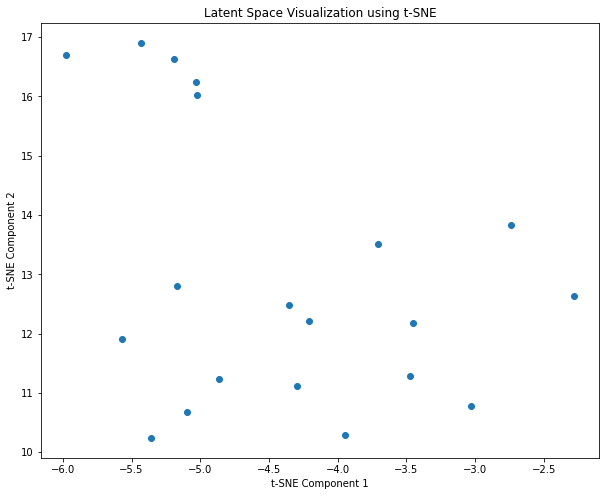

In [ ]:
# Extract the encoder part of the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

# Get encoded representations of the test images
encoded_test_images = encoder.predict(test_images)

# Reshape the encoded representations to 2D
encoded_test_images_2d = np.reshape(encoded_test_images, (encoded_test_images.shape[0], -1))

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
encoded_test_images_tsne = tsne.fit_transform(encoded_test_images_2d)

# Plot the t-SNE visualization of the latent space
plt.figure(figsize=(10, 8))
plt.scatter(encoded_test_images_tsne[:, 0], encoded_test_images_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Latent Space Visualization using t-SNE')
plt.show()

From the latent space visualization, we can see that the autoencoder recognize two clusters of images. It may be interesting to explore what the clusters consist of in the future research.

The visualization function displays the original images in the first row and the corresponding reconstructed images in the second row. The reconstructed images are processed using a sharpening filter to enhance their details.

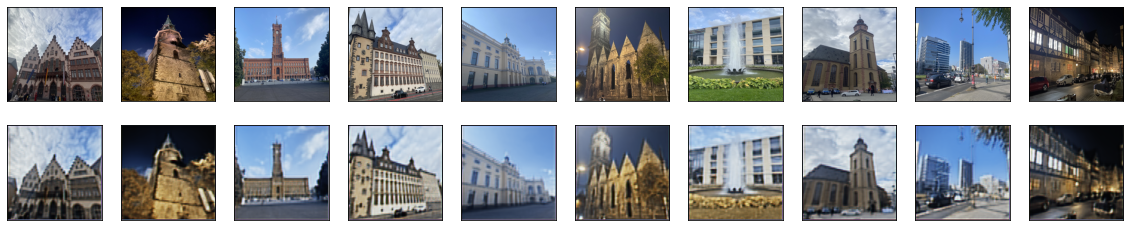

In [ ]:
def visualize_results(original_images, reconstructed_images, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        imgg = cv2.filter2D(reconstructed_images[i], -1, kernel)
        plt.imshow(imgg)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

visualize_results(test_images, reconstructed_images)


By examining the visualized results, we can observe that the autoencoder has managed to capture some of the overall structure and content of the original images. However, some differences are noticeable, such as a loss of details and overall blur. This observation is consistent with the performance metrics we analyzed earlier, which suggested that the autoencoder's performance is moderate.


I also calculated the compression ratio achieved by the autoencoder.

In [ ]:
def get_size_of_encoded_images(autoencoder, images):
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)
    encoded_images = encoder.predict(images)
    total_size = 0
    for img in encoded_images:
        total_size += getsizeof(img.tobytes())
    return total_size

def get_size_of_original_images(images):
    total_size = 0
    for img in images:
        total_size += getsizeof(img.tobytes())
    return total_size

# Calculate the size of original and encoded images
original_size = get_size_of_original_images(test_images)
encoded_size = get_size_of_encoded_images(autoencoder, test_images)

# Calculate the compression ratio
compression_ratio = original_size / encoded_size

print(f"Original size: {original_size} bytes")
print(f"Encoded size: {encoded_size} bytes")
print(f"Compression ratio: {compression_ratio:.2f}")

1/1 [==============================] - 0s 458ms/step
Original size: 31457940 bytes
Encoded size: 10486420 bytes
Compression ratio: 3.00


The calculated compression ratio is 3, meaning that the encoded images are three times smaller than the size of the original images. It indicates that the autoencoder can achieve a significant reduction in image size.

In conclusion, the Convolutional Autoencoder (CAE) shows potential for image compression tasks, but there is room for improvement in the model's performance. 

### Section 9

In this assignment, I explored image compression using a Convolutional Autoencoder (CAE). The objective was to compress images while maintaining a high level of reconstruction quality. 

#### Steps and Pipeline

**Data Preparation**: The dataset was preprocessed by resizing images to 256x256 pixels, normalizing pixel values to the range [0, 1], and splitting the data into training and test sets.

**Model Selection**: I chose a Convolutional Autoencoder for the image compression task due to its ability to capture spatial information and hierarchies of features in images, making it suitable for capturing complex structures in image data.

**Model Construction**: The CAE model was built using an encoder and a decoder. The encoder incorporated two convolutional layers and max-pooling layers, while the decoder contained two convolutional layers and up-sampling layers. The model was compiled with the Adam optimizer and the Mean Squared Error (MSE) loss function.

**Training**: The autoencoder was trained for 30 epochs using a batch size of 25, with the training images as input and target data.

**Performance Metrics**: I calculated the following performance metrics on the test set to evaluate the model: Average MSE, Average PSNR, and Average SSIM.

**Results Visualization**: I visualized the original and reconstructed images to assess the visual quality of the compressed images.

**Compression Ratio**: I calculated the compression ratio by comparing the sizes of the original and encoded images.

#### Key Results and Insights

The performance metrics revealed that the autoencoder achieved a moderate level of performance in terms of image quality:

**Average MSE**: 0.0065

**Average PSNR**: 22.15 dB

**Average SSIM**: 0.623

The visualized results showed that the autoencoder captured some of the original images' overall structure and content. However, some differences were noticeable, such as a loss of fine details and artifacts in the reconstructed images.

The calculated compression ratio was 3, indicating that the size of the encoded images was three times smaller than the original images.

#### Shortcomings and Improvements

One shortcoming of the approach is the moderate reconstruction quality achieved by the autoencoder. I can explore adjusting the architecture, hyperparameters, or training process to improve the model's performance. Additionally, incorporating other loss functions that better align with human perception, such as perceptual loss or a combination of multiple loss functions, could improve compression quality while maintaining or improving the achieved compression ratio.

In conclusion, the Convolutional Autoencoder demonstrates the potential for image compression tasks but requires further optimization to achieve higher-quality reconstruction.

#### Comparison to Previous Asssignment

In the **previous assignment**, the task was focused on image classification using a Convolutional Neural Network (CNN). The goal was to classify images into two categories: those taken in Argentina and those taken in Germany. The performance of the CNN was evaluated using metrics like accuracy, precision, and recall. The main objective was to build a model that could distinguish between the two classes based on the visual features present in the images.

In contrast, the **current assignment** focuses on image compression using a Convolutional Autoencoder (CAE). The goal is not to classify images but to compress them into a lower-dimensional representation while preserving as much information as possible. The autoencoder learns to encode the input images into a compressed latent space and then decode them back into the original image size. The performance of the CAE is evaluated using metrics like Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), Structural Similarity Index Measure (SSIM), and compression ratio. The main objective is to build a model that can efficiently compress images while maintaining visual quality.

### References

Github Repository of the assignment: https://github.com/Zhenia-Magic/SecondIterationCS156

1. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. http://www.deeplearningbook.org/

2. Masci, J., Meier, U., Cireşan, D., & Schmidhuber, J. (2011). Stacked Convolutional Auto-Encoders for Hierarchical Feature Extraction. Artificial Neural Networks and Machine Learning – ICANN 2011, 52-59. https://doi.org/10.1007/978-3-642-21735-7_7

3. Wang, Z., Bovik, A. C., Sheikh, H. R., & Simoncelli, E. P. (2004). Image quality assessment: from error visibility to structural similarity. IEEE Transactions on Image Processing, 13(4), 600-612. https://doi.org/10.1109/TIP.2003.819861

4. Abadi, M., Barham, P., Chen, J., Chen, Z., Davis, A., Dean, J., ... & Kudlur, M. (2016). TensorFlow: A system for large-scale machine learning. In 12th USENIX Symposium on Operating Systems Design and Implementation (OSDI 16) (pp. 265-283). https://www.usenix.org/system/files/conference/osdi16/osdi16-abadi.pdf